In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install rarfile

In [ ]:
import rarfile

r = rarfile.RarFile('/content/drive/MyDrive/DA Project/dataset.rar')
r.extractall()
r.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from numpy import argmax




In [ ]:
train = pd.read_csv('/content/drive/MyDrive/DA Project/Kaggle_Training_Dataset_v2.csv')
test = pd.read_csv('/content/drive/MyDrive/DA Project/Kaggle_Test_Dataset_v2.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
train.drop('sku', axis=1, inplace=True)
test.drop('sku', axis=1, inplace=True)

In [ ]:
test.shape[0]/ train.shape[0]

0.14342176281103716

In [ ]:
train

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


In [ ]:
train['went_on_backorder'].value_counts()

No     1676567
Yes      11293
Name: went_on_backorder, dtype: int64

In [ ]:
train.isnull().sum()

national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [ ]:
train.head(50)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
5,1044198,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No
6,1044643,1095.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
7,1045098,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.00,0.00,0.0,Yes,No,Yes,Yes,No,No
8,1045815,140.0,NaN,0.0,15.0,114.0,152.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
9,1045867,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No


In [ ]:
for columns in train.columns:
  print(train[columns].value_counts())

1456423    1
1669339    1
1669329    1
1669330    1
1669331    1
          ..
2231960    1
2231961    1
2231962    1
2231963    1
3272144    1
Name: sku, Length: 1687861, dtype: int64
0.0         108425
2.0         107869
3.0          90577
4.0          69588
5.0          58916
             ...  
21196.0          1
5701.0           1
53584.0          1
339529.0         1
6170.0           1
Name: national_inv, Length: 14969, dtype: int64
8.0     682186
2.0     337402
12.0    199700
4.0     128537
9.0     123649
52.0     30113
3.0      16253
10.0     14192
0.0      10511
14.0     10314
16.0      8843
13.0      5405
6.0       5365
5.0       4031
15.0      3812
17.0      3763
11.0      1094
20.0       416
30.0       312
18.0       221
7.0        209
22.0       133
24.0       115
26.0       105
28.0        84
21.0        49
40.0        48
35.0        35
19.0        28
1.0         21
23.0        14
25.0         7
Name: lead_time, dtype: int64
0.0        1344662
1.0          36515
2.0        

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [ ]:
test

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,No,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,88.0,4.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No


In [ ]:
train['potential_issue'] = train.potential_issue.factorize()[0]
train['deck_risk'] = train.deck_risk.factorize()[0]
train['oe_constraint'] = train.oe_constraint.factorize()[0]
train['ppap_risk'] = train.ppap_risk.factorize()[0]
train['stop_auto_buy'] = train.stop_auto_buy.factorize()[0]
train['rev_stop'] = train.rev_stop.factorize()[0]
train['went_on_backorder'] = train.went_on_backorder.factorize()[0]

In [ ]:
test['potential_issue'] = test.potential_issue.factorize()[0]
test['deck_risk'] = test.deck_risk.factorize()[0]
test['oe_constraint'] = test.oe_constraint.factorize()[0]
test['ppap_risk'] = test.ppap_risk.factorize()[0]
test['stop_auto_buy'] = test.stop_auto_buy.factorize()[0]
test['rev_stop'] = test.rev_stop.factorize()[0]
test['went_on_backorder'] = test.went_on_backorder.factorize()[0]

In [ ]:
train

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,0,0,0,0,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,0,0,0
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,1,0,0,0,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,0,0,0
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,-99.00,-99.00,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,0,0.0,-99.00,-99.00,1.0,0,0,0,0,0,0
1687857,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,0,0.0,0.86,0.84,1.0,1,0,0,1,0,1
1687858,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,0,0.0,0.86,0.84,6.0,0,0,0,0,0,0
1687859,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,0,0.0,0.73,0.78,1.0,0,0,0,0,0,0


In [ ]:
test.isnull().sum()

national_inv             1
lead_time            14725
in_transit_qty           1
forecast_3_month         1
forecast_6_month         1
forecast_9_month         1
sales_1_month            1
sales_3_month            1
sales_6_month            1
sales_9_month            1
min_bank                 1
potential_issue          0
pieces_past_due          1
perf_6_month_avg         1
perf_12_month_avg        1
local_bo_qty             1
deck_risk                0
oe_constraint            0
ppap_risk                0
stop_auto_buy            0
rev_stop                 0
went_on_backorder        0
dtype: int64

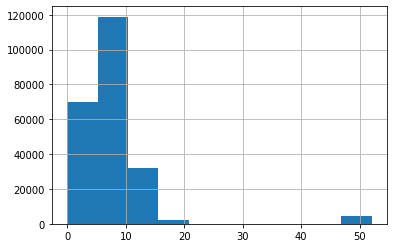

In [ ]:
test['lead_time'].hist()

In [ ]:
train.lead_time=train.lead_time.fillna(train.lead_time.median())
test.lead_time=test.lead_time.fillna(test.lead_time.median())

In [ ]:
train.isnull().sum()

national_inv         1
lead_time            0
in_transit_qty       1
forecast_3_month     1
forecast_6_month     1
forecast_9_month     1
sales_1_month        1
sales_3_month        1
sales_6_month        1
sales_9_month        1
min_bank             1
potential_issue      0
pieces_past_due      1
perf_6_month_avg     1
perf_12_month_avg    1
local_bo_qty         1
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [ ]:
train.dropna(axis=0,inplace=True)
test.dropna(axis=0,inplace=True)

In [ ]:
train.corr()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
national_inv,1.000000,0.003321,0.098238,0.078199,0.079744,0.078948,0.147449,0.192605,0.225067,0.239613,0.399969,0.000273,0.030677,-0.013544,-0.010732,0.014887,-0.005156,0.000185,-0.000062,0.003380,-0.000305,-0.001315
lead_time,0.003321,1.000000,-0.006863,-0.008045,-0.008548,-0.008773,-0.005618,-0.006769,-0.007117,-0.007261,-0.007094,-0.005011,-0.001510,-0.052305,-0.049527,-0.001259,0.134983,-0.003095,0.010739,0.240950,0.001077,-0.018104
in_transit_qty,0.098238,-0.006863,1.000000,0.662648,0.687768,0.679152,0.619270,0.698417,0.689908,0.659372,0.749974,0.007126,0.167460,0.003282,0.004292,0.066612,-0.016188,0.002565,-0.000671,0.001085,0.000644,-0.002427
forecast_3_month,0.078199,-0.008045,0.662648,1.000000,0.990490,0.977337,0.684494,0.781178,0.835585,0.825539,0.725042,0.007378,0.361214,0.008445,0.008694,0.039419,-0.017508,0.002798,-0.003625,-0.002836,0.000574,-0.000340
forecast_6_month,0.079744,-0.008548,0.687768,0.990490,1.000000,0.994945,0.701770,0.808755,0.868099,0.858253,0.738553,0.006573,0.363147,0.008343,0.008499,0.039724,-0.017789,0.002473,-0.003864,-0.003413,-0.000059,-0.000840
forecast_9_month,0.078948,-0.008773,0.679152,0.977337,0.994945,1.000000,0.716367,0.829911,0.891884,0.881894,0.735891,0.006324,0.366001,0.008306,0.008421,0.039732,-0.017939,0.002493,-0.003956,-0.003536,-0.000274,-0.001030
sales_1_month,0.147449,-0.005618,0.619270,0.684494,0.701770,0.716367,1.000000,0.918548,0.867479,0.815959,0.756137,0.004355,0.249526,0.001163,0.002370,0.066188,-0.014748,0.003402,-0.000919,0.004737,-0.000541,-0.001131
sales_3_month,0.192605,-0.006769,0.698417,0.781178,0.808755,0.829911,0.918548,1.000000,0.975594,0.929491,0.856017,0.004916,0.304565,0.001488,0.002837,0.071030,-0.017196,0.003500,-0.001229,0.004920,-0.000576,-0.001512
sales_6_month,0.225067,-0.007117,0.689908,0.835585,0.868099,0.891884,0.867479,0.975594,1.000000,0.971833,0.837110,0.004841,0.323552,0.002898,0.004221,0.057765,-0.018170,0.003624,-0.002208,0.002972,-0.000541,-0.001728
sales_9_month,0.239613,-0.007261,0.659372,0.825539,0.858253,0.881894,0.815959,0.929491,0.971833,1.000000,0.800890,0.004669,0.317692,0.003438,0.004749,0.048880,-0.018165,0.003477,-0.002783,0.001894,-0.000547,-0.001764


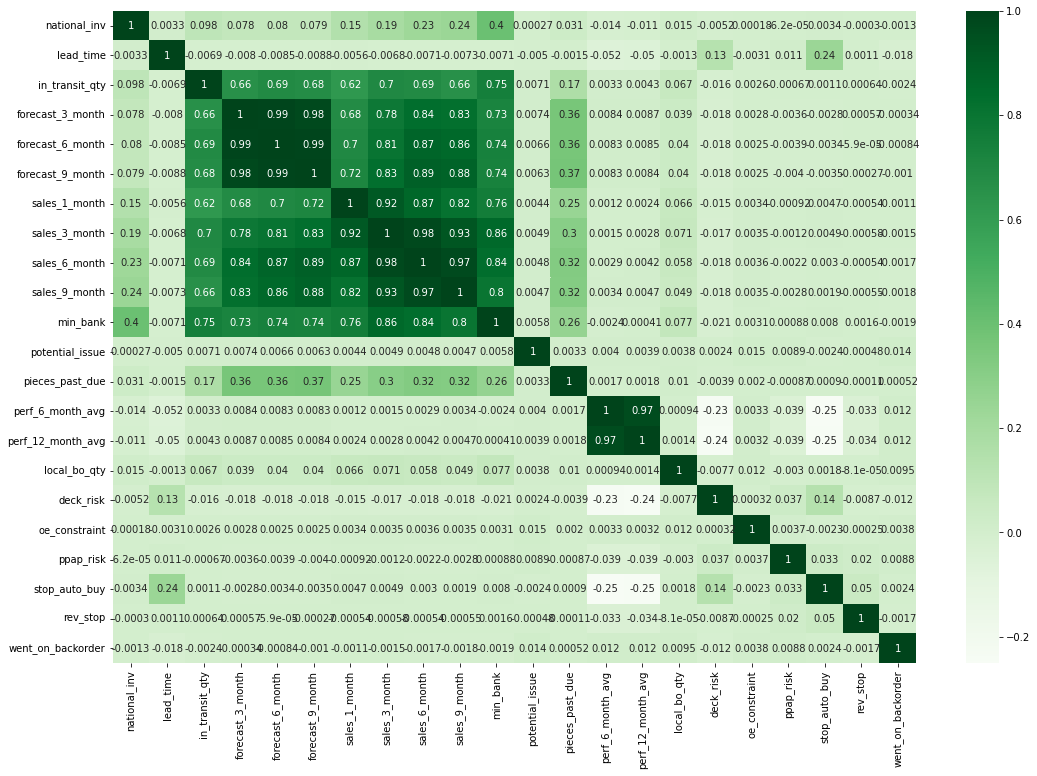

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(train.corr(method='pearson'), cmap="Greens",annot=True)

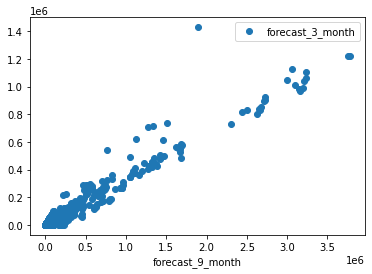

In [ ]:
train.plot(x='forecast_9_month', y='forecast_3_month', style='o')


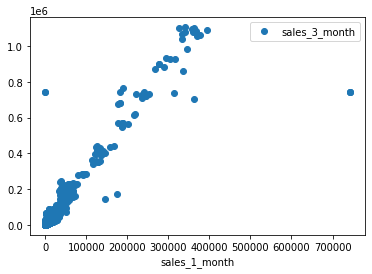

In [ ]:
train.plot(x='sales_1_month', y='sales_3_month', style='o')


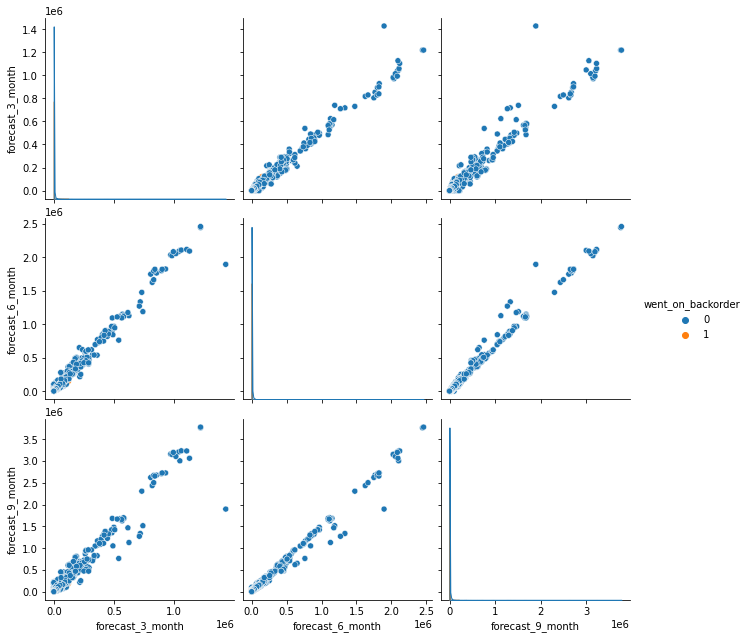

In [ ]:
compare = ['forecast_3_month','forecast_6_month', 'forecast_9_month']

# Pair-wise scatter plot for the forecasts
sns.pairplot(train, vars=compare, hue='went_on_backorder', height=3)

# Show the plot
plt.show()

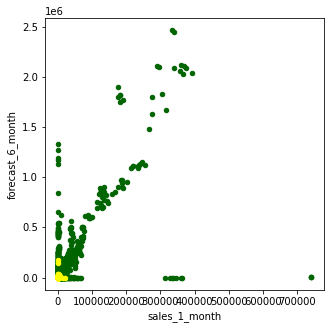

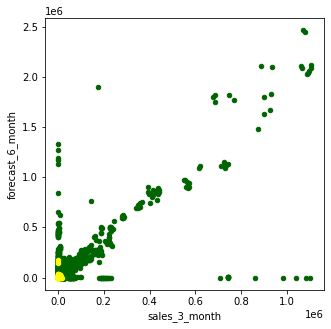

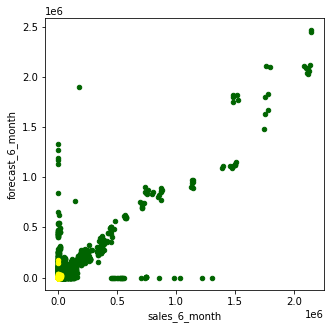

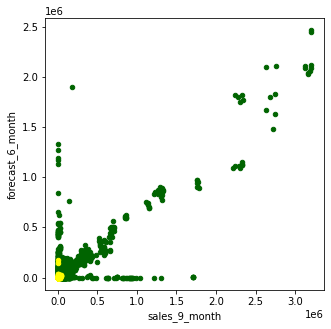

In [ ]:
no_bo=train.loc[train['went_on_backorder']==0]
yes_bo=train.loc[train['went_on_backorder']==1]
sales = ['sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month']
for col in sales:
    fig=plt.figure(figsize=(5,5))
    ax=fig.gca()
    no_bo.plot(kind='scatter', x=col, y='forecast_6_month', ax=ax, color='DarkGreen', legend=True)
    yes_bo.plot(kind='scatter', x=col, y='forecast_6_month', ax=ax, color='Yellow')

In [ ]:
#Can note that, given the relation between Forecast and sales, backorders happen during low sales and forecasts.

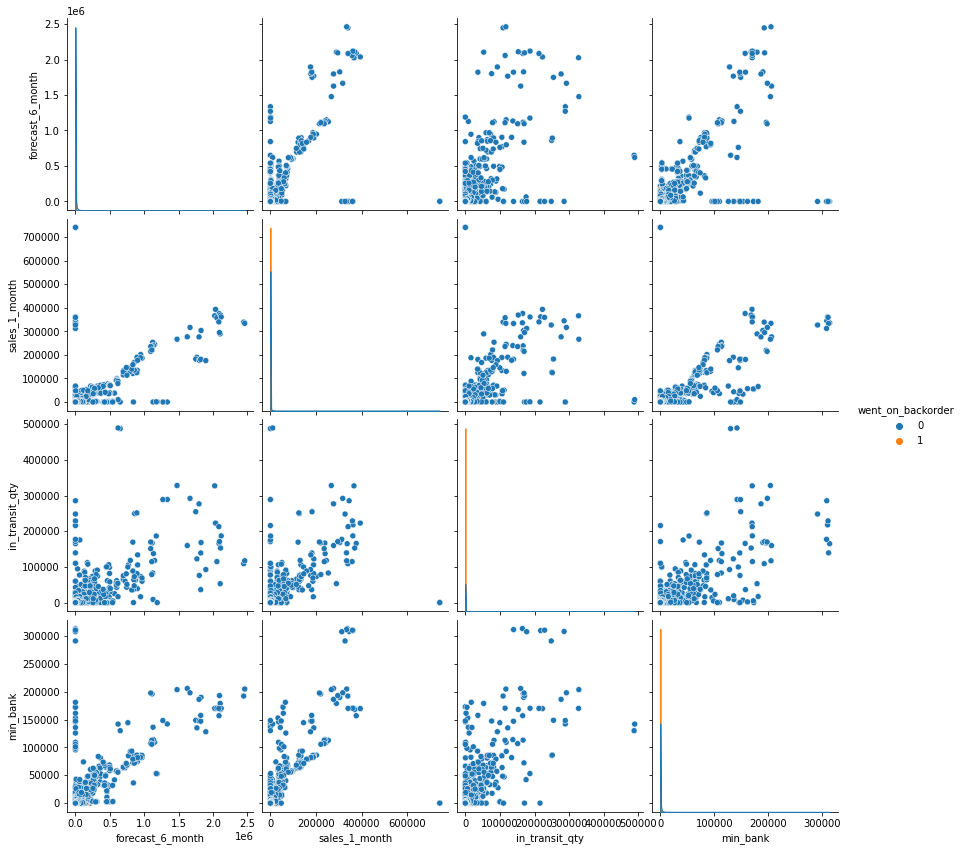

In [ ]:
#Checking for relation between forecast, past sales, in transit and min bank using scatter plot. 
#This is to reduce the over all feratures to avoid overfitting.

check_features=['forecast_6_month', 'sales_1_month','in_transit_qty', 'min_bank']

sns.pairplot(train, vars=check_features, hue='went_on_backorder', height=3)
plt.show()

In [ ]:
train['perf_12_month_avg'].value_counts()

 0.99     132425
-99.00    122050
 0.78     117662
 0.98      92825
 0.97      66029
           ...  
 0.23        857
 0.06        817
 0.05        646
 0.03        563
 0.02        420
Name: perf_12_month_avg, Length: 102, dtype: int64

In [ ]:
122050/1687860 *100

7.231049968599292

In [ ]:
train

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,0,0,0,0,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,0,0,0
2,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,1,0,0,0,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,0,0,0
4,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,-99.00,-99.00,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,0,0.0,0.69,0.69,5.0,1,0,0,0,0,0
1687856,-1.0,8.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,0,0.0,-99.00,-99.00,1.0,0,0,0,0,0,0
1687857,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,0,0.0,0.86,0.84,1.0,1,0,0,1,0,1
1687858,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,0,0.0,0.86,0.84,6.0,0,0,0,0,0,0


In [ ]:
train=train[train.perf_12_month_avg != -99]
train=train[train.perf_6_month_avg != -99]


In [ ]:
train

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,0,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,0,0,0
5,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.82,0.87,0.0,0,0,0,0,0,0
7,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00,0.00,0.0,1,0,1,0,0,0
9,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.82,0.87,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687854,124.0,8.0,140.0,410.0,780.0,1240.0,128.0,464.0,849.0,1074.0,111.0,0,0.0,0.85,0.90,1.0,0,0,0,0,0,0
1687855,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,0,0.0,0.69,0.69,5.0,1,0,0,0,0,0
1687857,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,0,0.0,0.86,0.84,1.0,1,0,0,1,0,1
1687858,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,0,0.0,0.86,0.84,6.0,0,0,0,0,0,0


In [ ]:
test=test[test.perf_12_month_avg != -99]
test=test[test.perf_6_month_avg != -99]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train.drop('went_on_backorder', axis=1))
train_scaled = pd.DataFrame(train_scaled, index=train.index, columns=[train.columns.to_list()[0:-1]])
# train_scaled['went_on_backorder']=train['went_on_backorder']


In [ ]:
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test.drop('went_on_backorder', axis=1))
test_scaled = pd.DataFrame(test_scaled, index=test.index, columns=[test.columns.to_list()[0:-1]])
# test_scaled['went_on_backorder']=test['went_on_backorder']

In [ ]:
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm
from sklearn.ensemble import AdaBoostClassifier # AdaBoost
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [ ]:
train['went_on_backorder'].value_counts(normalize=True)

0    0.993029
1    0.006971
Name: went_on_backorder, dtype: float64

In [ ]:
X_train=train_scaled
y_train=train['went_on_backorder']
X_test=test_scaled
y_test=test['went_on_backorder']

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
print(classification_report(y_test, lr_yhat))
print("AUC is"  ,roc_auc_score(y_test, (lr.predict_proba(X_test.values))[:,1]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    220410
           1       0.12      0.00      0.00      2564

    accuracy                           0.99    222974
   macro avg       0.56      0.50      0.50    222974
weighted avg       0.98      0.99      0.98    222974

AUC is 0.6387436102452946


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

print(classification_report(y_test, rf_yhat))
print("AUC is"  ,roc_auc_score(y_test, (rf.predict_proba(X_test.values))[:,1]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    220410
           1       0.11      0.01      0.02      2564

    accuracy                           0.99    222974
   macro avg       0.55      0.50      0.50    222974
weighted avg       0.98      0.99      0.98    222974

AUC is 0.7485662861249716


In [ ]:
print('Before OverSampling, counts of label 1: {}'.format(sum(y_train == 1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train == 0)))
  

from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label 1: 10863
Before OverSampling, counts of label 0: 1547519 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


After OverSampling, the shape of train_X: (3095038, 6)
After OverSampling, the shape of train_y: (3095038,) 

After OverSampling, counts of label '1': 1547519
After OverSampling, counts of label '0': 1547519


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
rf_yhat = rf.predict(X_test)

print(classification_report(y_test, rf_yhat))
print("AUC is"  ,roc_auc_score(y_test, (rf.predict_proba(X_test.values))[:,1]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.99      0.74      0.85    220410
           1       0.02      0.53      0.04      2564

    accuracy                           0.73    222974
   macro avg       0.51      0.63      0.45    222974
weighted avg       0.98      0.73      0.84    222974

AUC is 0.6850638552559933


In [ ]:
lr = LogisticRegression()
lr.fit(X_train_res, y_train_res)
lr_yhat = lr.predict(X_test)
print(classification_report(y_test, lr_yhat))
print("AUC is"  ,roc_auc_score(y_test, (lr.predict_proba(X_test.values))[:,1]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       1.00      0.17      0.29    220410
           1       0.01      0.98      0.03      2564

    accuracy                           0.18    222974
   macro avg       0.51      0.57      0.16    222974
weighted avg       0.99      0.18      0.28    222974

AUC is 0.7029017879103622


In [ ]:
#  best performing model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)
print(classification_report(y_test, xgb_yhat))
print("AUC is"  ,roc_auc_score(y_test, (xgb.predict_proba(X_test))[:,1]))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    220410
           1       0.14      0.01      0.02      2564

    accuracy                           0.99    222974
   macro avg       0.56      0.50      0.51    222974
weighted avg       0.98      0.99      0.98    222974

AUC is 0.7731329151083561


In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)
xgb_yhat = xgb.predict(X_test)
print(classification_report(y_test, xgb_yhat))
print("AUC is"  ,roc_auc_score(y_test, (xgb.predict_proba(X_test))[:,1]))

              precision    recall  f1-score   support

           0       1.00      0.14      0.25    220410
           1       0.01      0.99      0.03      2564

    accuracy                           0.15    222974
   macro avg       0.51      0.57      0.14    222974
weighted avg       0.99      0.15      0.25    222974

AUC is 0.7499643551823466


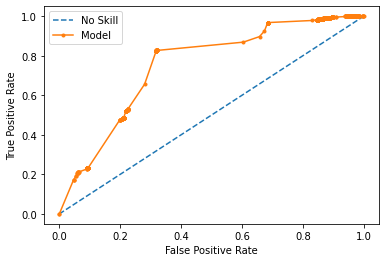

In [ ]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# calculate roc curves
# fpr, tpr, thresholds = roc_curve(y_test, prediction)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.744473


In [ ]:
xgb.feature_importances_

array([0.09153265, 0.01862495, 0.05760324, 0.41662613, 0.13009593,
       0.02075657, 0.0492675 , 0.03396354, 0.0223974 , 0.03541004,
       0.        , 0.        , 0.04331099, 0.01827076, 0.        ,
       0.06214034, 0.        , 0.        , 0.        , 0.        ,
       0.        ], dtype=float32)

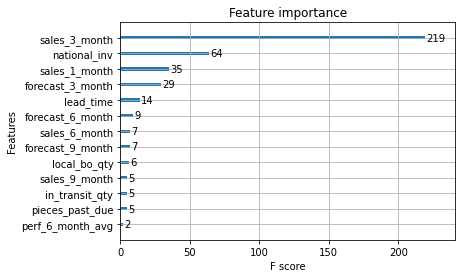

In [ ]:
from xgboost import plot_importance

plot_importance(xgb)
pyplot.show()

In [ ]:
# using just 6 features

In [ ]:
train_scaled=train_scaled.iloc[:,[0,1,4,3,6,7]]
test_scaled=test_scaled.iloc[:,[0,1,4,3,6,7]]

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)
xgb_yhat = xgb.predict(X_test)
print(classification_report(y_test, xgb_yhat))
print("AUC is"  ,roc_auc_score(y_test, (xgb.predict_proba(X_test))[:,1]))

              precision    recall  f1-score   support

           0       1.00      0.15      0.26    220410
           1       0.01      0.99      0.03      2564

    accuracy                           0.16    222974
   macro avg       0.51      0.57      0.14    222974
weighted avg       0.99      0.16      0.26    222974

AUC is 0.7532223196509186


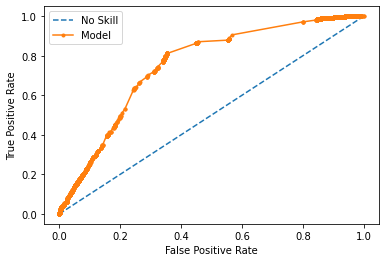

In [ ]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()